In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
SAMPLING_RATE = 22050

In [3]:
T = 1

In [4]:
test_bool_list = [True, True, False, False]

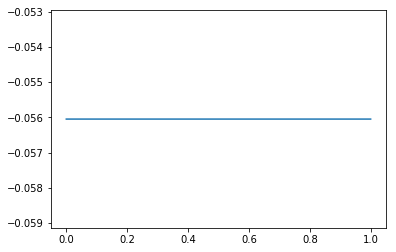

In [5]:
bound = 1
val   = np.sqrt(np.pi/1000)
x_box = np.linspace(0, bound, bound*SAMPLING_RATE)

box_0 = val * signal.square(x_box, 0)
box_1 = val * signal.square(x_box, 1)

plt.plot(x_box, box_0)

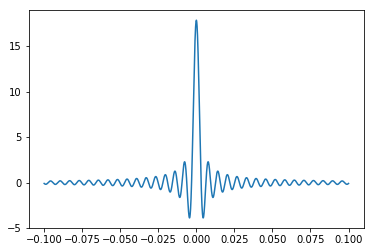

In [6]:
x_sinc = np.linspace(-0.1, 0.1, SAMPLING_RATE)

sinc = np.sqrt(1000/np.pi) * np.sinc(x_sinc * 1000/np.pi)

plt.plot(x_sinc, sinc)

/home/thenitronos/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


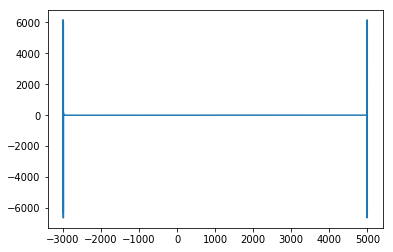

In [7]:
x_fft = np.linspace(-3000, 5000, SAMPLING_RATE)

fft = np.fft.fft(sinc)

plt.plot(x_fft, fft)